<a href="https://colab.research.google.com/github/domsoos/machine_learning/blob/master/CNN_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# the data is only in 2d
#convolution expects to have height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5214 - accuracy: 0.8063 - val_loss: 0.4040 - val_accuracy: 0.8505
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3615 - accuracy: 0.8643 - val_loss: 0.3535 - val_accuracy: 0.8682
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3146 - accuracy: 0.8823 - val_loss: 0.3232 - val_accuracy: 0.8781
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2826 - accuracy: 0.8943 - val_loss: 0.2996 - val_accuracy: 0.8897
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2584 - accuracy: 0.9033 - val_loss: 0.3118 - val_accuracy: 0.8862
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2362 - accuracy: 0.9112 - val_loss: 0.3028 - val_accuracy: 0.8903
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2177 - accuracy: 0.9177 - val_loss: 0.3026 -

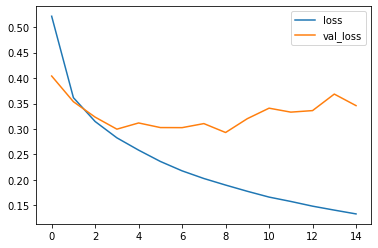

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

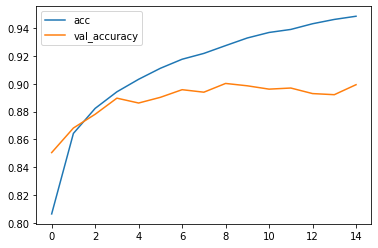

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[867   3  20  11   1   1  91   0   6   0]
 [  3 983   1   8   2   1   1   0   1   0]
 [ 15   1 864  12  41   0  67   0   0   0]
 [ 18  12  14 908  23   1  24   0   0   0]
 [  1   2  71  38 788   0  97   0   3   0]
 [  0   0   0   0   0 972   0  23   0   5]
 [114   2  74  26  66   0 707   0  11   0]
 [  0   0   0   0   0   6   0 973   0  21]
 [  3   0   2   4   3   4  10   2 971   1]
 [  1   0   0   0   0   7   0  31   0 961]]


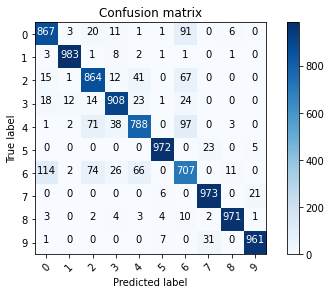

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalie=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalize confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

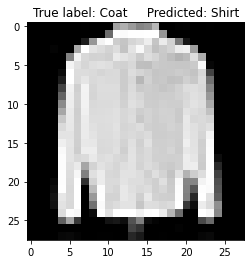

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s     Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));